<a href="https://colab.research.google.com/github/SinethS/Pattern-Recognition-A1/blob/main/EN3150_Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression Impact on Outliers**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

In [ ]:
from sklearn.linear_model import LinearRegression

x_reshaped = x.reshape(-1, 1)  # sklearn needs 2D input
model = LinearRegression()
model.fit(x_reshaped, y)

m = model.coef_[0]       # slope
c = model.intercept_     # intercept

print(f"Fitted model: y = {m:.2f}x + {c:.2f}")


Fitted model: y = -3.56x + 3.92


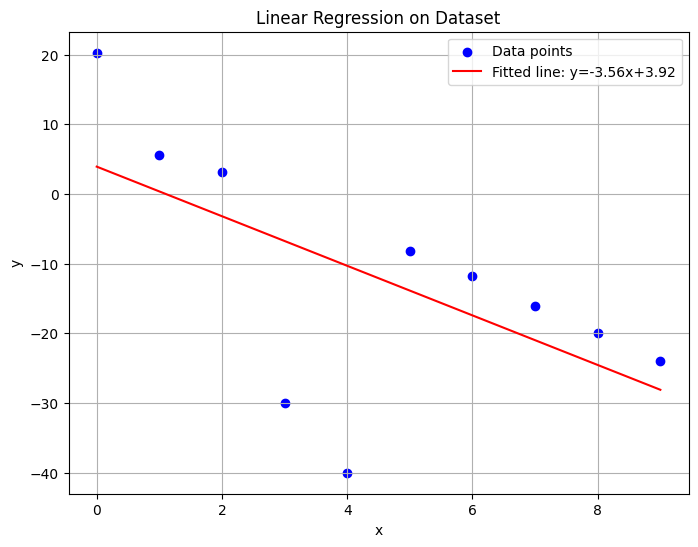

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue', label='Data points')

# Regression line
y_pred = model.predict(x_reshaped)
plt.plot(x, y_pred, color='red', label=f'Fitted line: y={m:.2f}x+{c:.2f}')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression on Dataset")
plt.legend()
plt.grid(True)
plt.show()


**Defining the 2 models**


In [ ]:
# y = -4x + 12
def model1(x):
  return -4 * x + 12

# y = -3.56x + 3.92
def model2(x):
  return -3.55 * x + 3.91

**Implementation of the Robust Loss Function**

In [ ]:
def robust_loss(y_true, y_pred, beta):
    e = y_true - y_pred  # errors
    return np.mean((e**2) / (e**2 + beta**2))

In [ ]:
beta_values = [1,1e-6,1e3]
results = []

y_pred1 = model1(x)
y_pred2 = model2(x)

for beta in beta_values:
  loss_1 = robust_loss(y,y_pred1, beta)
  loss_2 = robust_loss(y,y_pred2, beta)
  results.append((beta, loss_1, loss_2))

# Print comparison table
print(f"{'Beta':>10} {'Loss(Model1)':>15} {'Loss(Model2)':>15}")
for beta, l1, l2 in results:
    print(f"{beta:>10} {l1:>15.6f} {l2:>15.6f}")

      Beta    Loss(Model1)    Loss(Model2)
         1        0.435416        0.972847
     1e-06        1.000000        1.000000
    1000.0        0.000227        0.000188


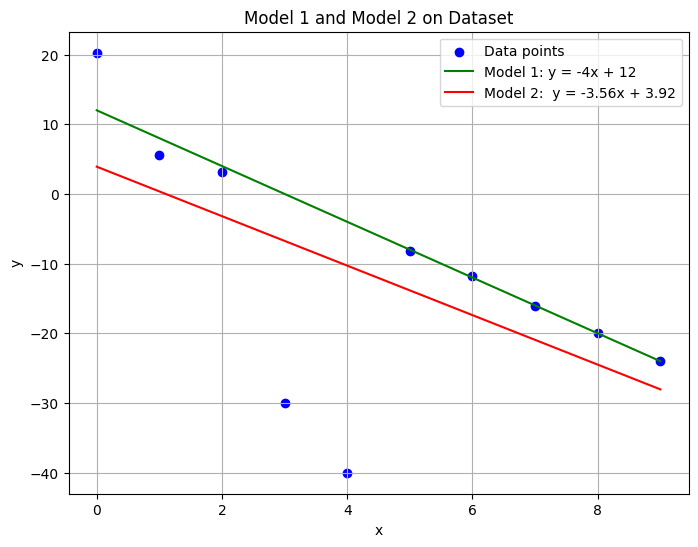

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue', label='Data points')

# Regression line
# y_pred = model.predict(x_reshaped)
plt.plot(x, y_pred1, color='green', label=f'Model 1: y = -4x + 12')
plt.plot(x, y_pred2, color='red', label=f'Model 2:  y = -3.56x + 3.92')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Model 1 and Model 2 on Dataset")
plt.legend()
plt.grid(True)
plt.show()

**How the loss varies with beta**

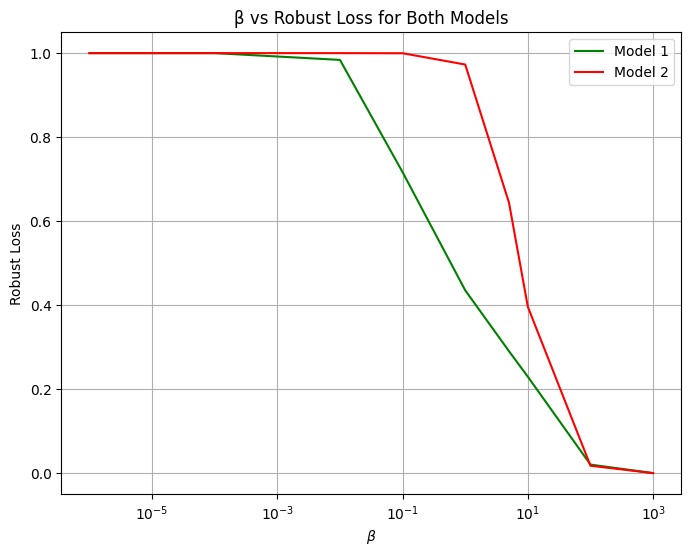

In [ ]:
beta_range = [1e-6,1e-4,1e-2,1e-1,1,5,10,100,1000]
results_new=[]
for beta in beta_range:
  loss_1 = robust_loss(y,y_pred1, beta)
  loss_2 = robust_loss(y,y_pred2, beta)
  results_new.append((beta, loss_1, loss_2))

beta = [r[0] for r in results_new]
loss_1 = [r[1] for r in results_new]
loss_2 = [r[2] for r in results_new]

plt.figure(figsize=(8,6))
#plt.scatter(x, y, color='blue', label='Data points')

# Regression line
# y_pred = model.predict(x_reshaped)
plt.plot(beta, loss_1, color='green', label=f'Model 1')
plt.plot(beta, loss_2, color='red', label=f'Model 2')
plt.xscale('log')

plt.xlabel(r'$\beta$')
plt.ylabel('Robust Loss')
plt.title('β vs Robust Loss for Both Models')
plt.legend()
plt.grid(True)
plt.show()

# **Loss Function**

In [ ]:
# MeanSquaredError
def MSE(y_true, y_pred):
    e = y_true - y_pred  # errors
    return (e**2)

# Binary Cross Entropy (BCE)
def BCE(y_true, y_pred):
    #avg = np.mean((y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)))
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [ ]:
# True value
y_true = 1.0

# Predictions from table
y_pred = np.array([0.005, 0.01, 0.05, 0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7,0.8, 0.9, 1.0])

In [ ]:
mse_values = MSE(y_true, y_pred)
bce_values = BCE(y_true, y_pred)

df_losses = pd.DataFrame({
    'True y': [y_true]*len(y_pred),
    'Prediction y_hat': y_pred,
    'MSE': mse_values,
    'BCE': bce_values
})

# Format numbers for neat output
pd.options.display.float_format = '{:.3f}'.format

print(df_losses.to_string(index=False))

 True y  Prediction y_hat   MSE   BCE
  1.000             0.005 0.990 5.298
  1.000             0.010 0.980 4.605
  1.000             0.050 0.902 2.996
  1.000             0.100 0.810 2.303
  1.000             0.200 0.640 1.609
  1.000             0.300 0.490 1.204
  1.000             0.400 0.360 0.916
  1.000             0.500 0.250 0.693
  1.000             0.600 0.160 0.511
  1.000             0.700 0.090 0.357
  1.000             0.800 0.040 0.223
  1.000             0.900 0.010 0.105
  1.000             1.000 0.000   NaN


/tmp/ipython-input-3080720782.py:9: RuntimeWarning: divide by zero encountered in log
  return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
/tmp/ipython-input-3080720782.py:9: RuntimeWarning: invalid value encountered in multiply
  return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


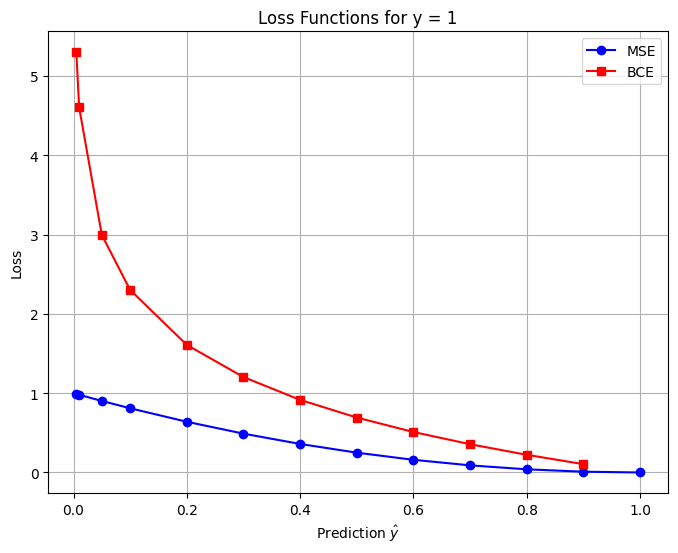

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(y_pred, mse_values, marker='o', label='MSE', color='blue')
plt.plot(y_pred, bce_values, marker='s', label='BCE', color='red')

plt.xlabel(r'Prediction $\hat{y}$')
plt.ylabel('Loss')
plt.title('Loss Functions for y = 1')
plt.legend()
plt.grid(True)
plt.show()

# **Data Pre-processing**

/tmp/ipython-input-23931767.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sparse_signal[10] = np.random.randn(1) + 30


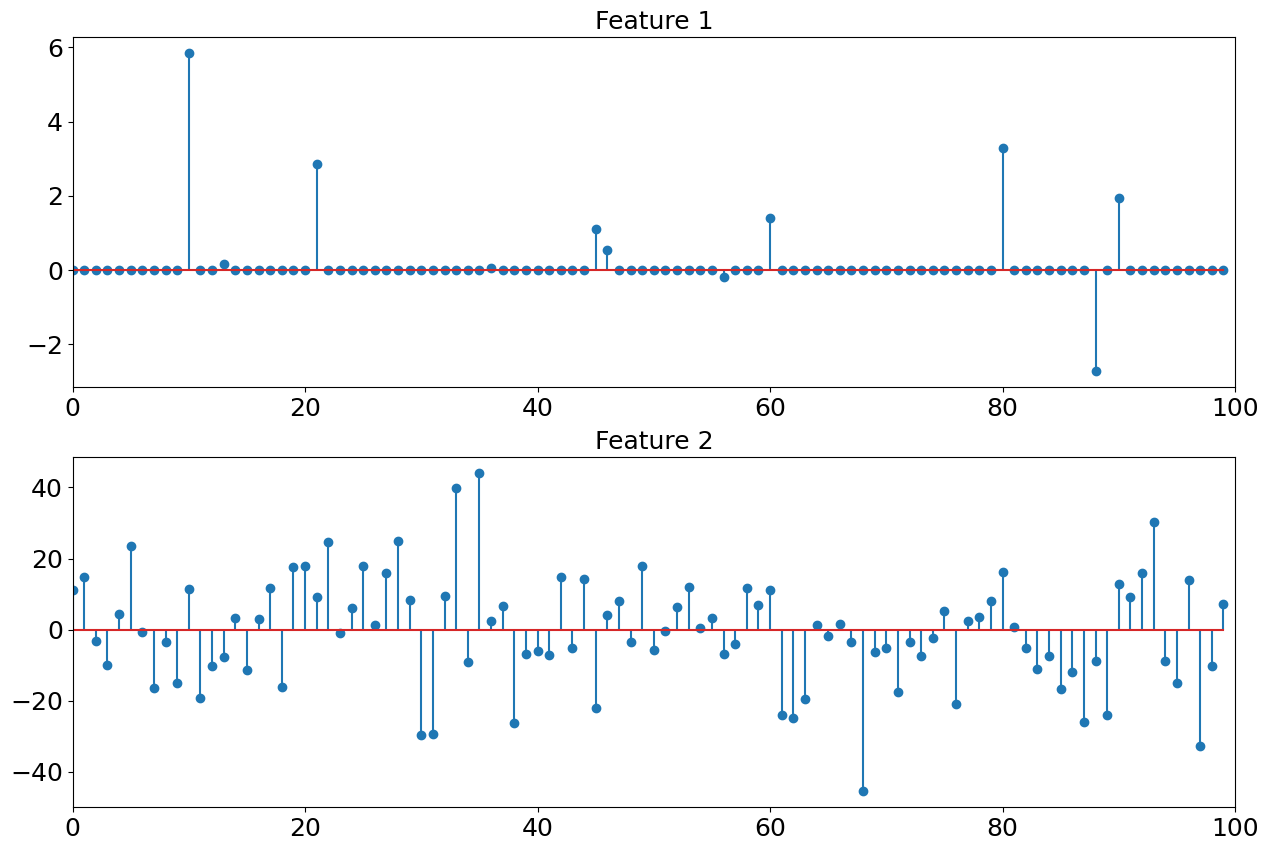

In [ ]:
# Function to generate sparse signal
def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)  #pick random indexes(amount =num_nonzero ) to make non zero values , 0 =< range =< signal_length-1
    nonzero_values = 10 * np.random.randn(num_nonzero)  # create amplitudes for non zero indices (values are taken from the standard normal distribution and x10 them)
    signal[nonzero_indices] = nonzero_values
    return signal

# Parameters
signal_length = 100  # Total length of the signal
num_nonzero = 10     # Number of non-zero elements in the signal
your_index_no = 220280

# Generate sparse signal
sparse_signal = generate_signal(signal_length, num_nonzero)

# Modify specific element based on index number
sparse_signal[10] = (your_index_no % 10) * 2 + 10
if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30

# Scale the sparse signal
sparse_signal = sparse_signal / 5

# Generate Feature 2 (noise)
epsilon = np.random.normal(0, 15, signal_length)

# --- Plot ---
plt.figure(figsize=(15, 10))

# Feature 1
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(sparse_signal)

# Feature 2
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=18)
plt.stem(epsilon)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()


**Scaling**

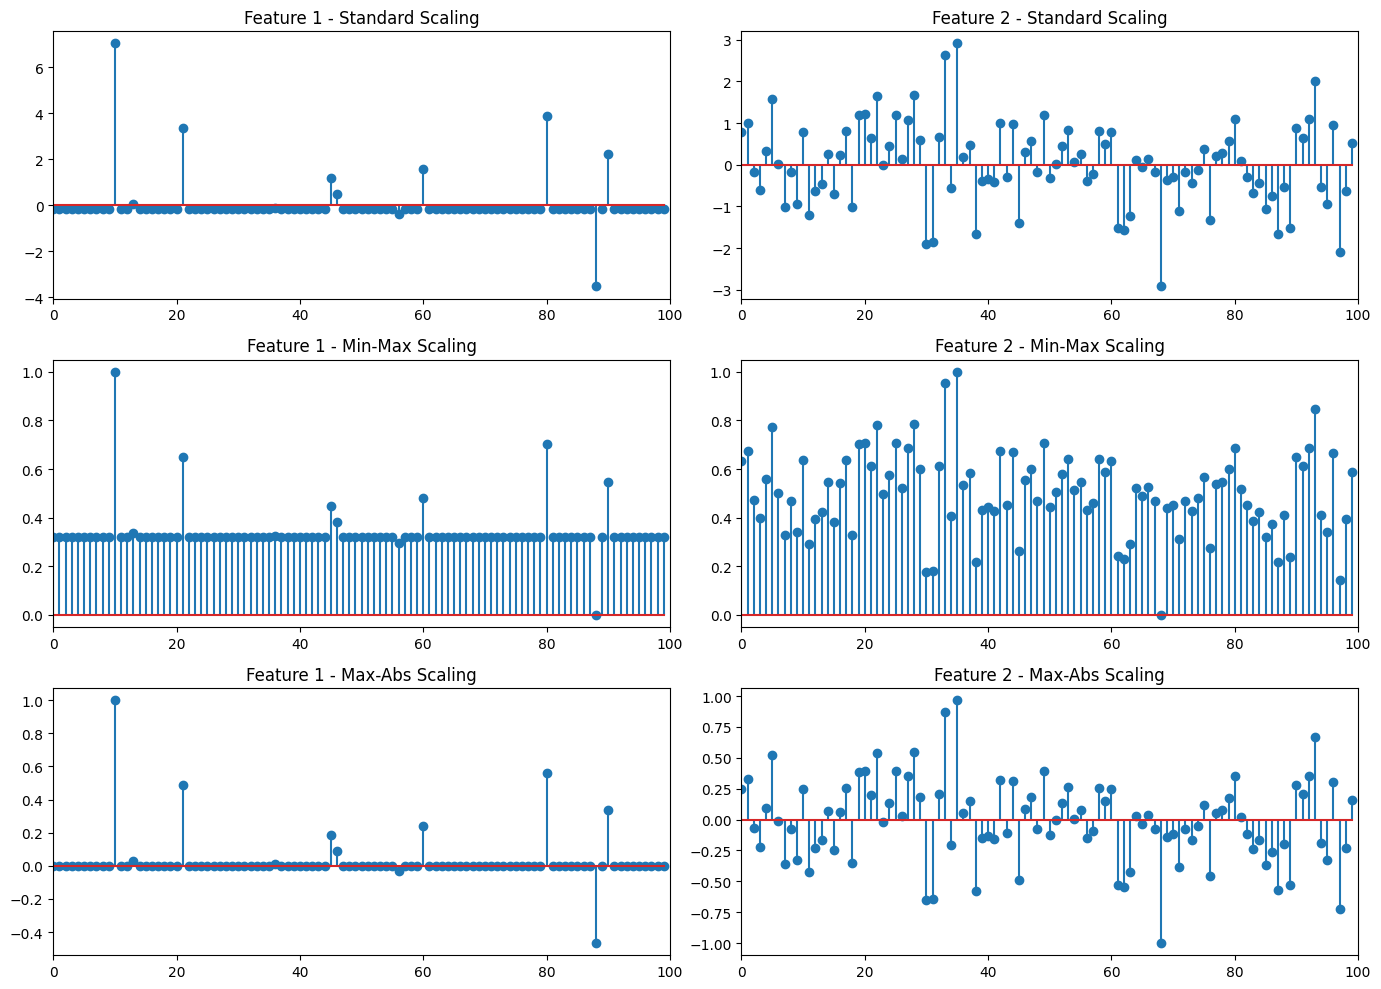

In [ ]:
from  sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


# --- Scaling ---
scalers = {
    "Standard Scaling": StandardScaler(),
    "Min-Max Scaling": MinMaxScaler(),
    "Max-Abs Scaling": MaxAbsScaler()
}

# Apply scaling to each feature
scaled_results_feature1 = {name: scaler.fit_transform(sparse_signal.reshape(-1, 1)).flatten()
                           for name, scaler in scalers.items()}
scaled_results_feature2 = {name: scaler.fit_transform(epsilon.reshape(-1, 1)).flatten()
                           for name, scaler in scalers.items()}

# --- Plot results ---
fig, axs = plt.subplots(3, 2, figsize=(14, 10))

for i, (name, scaled) in enumerate(scaled_results_feature1.items()):
    axs[i, 0].stem(scaled)
    axs[i, 0].set_title(f"Feature 1 - {name}")
    axs[i, 0].set_xlim(0, signal_length)

for i, (name, scaled) in enumerate(scaled_results_feature2.items()):
    axs[i, 1].stem(scaled)
    axs[i, 1].set_title(f"Feature 2 - {name}")
    axs[i, 1].set_xlim(0, signal_length)

plt.tight_layout()
plt.show()